In [1]:
import nibabel as nib
import os

def print_nifti_headers(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
    t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
    #t1xflair_file_q = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    #t1xflair_seg_file_q = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg_qform.nii")
    
    
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(t1xflair_seg_file) or not os.path.exists(t1_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    t1xflair_seg_file = nib.load(t1xflair_seg_file)
    t1_img = nib.load(t1_file)
    #t1xflair_img_q = nib.load(t1xflair_file_q)
    #t1xflair_seg_file_q = nib.load(t1xflair_seg_file_q)
    
    #print(f"Headers for subject {subject_id}:")
    #print("\nT1xFLAIR Header:")
    #print(t1xflair_img.header)
    #print("\nT1xFLAIR Affine:")
    #print(t1xflair_img.affine)
    #print("\nT1xFLAIR sform:")
    #print(t1xflair_img.get_sform())
    #print("\nT1xFLAIR qform:")
    #print(t1xflair_img.get_qform())
    
    #print("\nT1xFLAIR Seg Header:")
    #print(t1xflair_seg_file.header)
    #print("\nT1xFLAIR Seg Affine:")
    #print(t1xflair_seg_file.affine)
    #print("\nT1xFLAIR Seg sform:")
    #print(t1xflair_seg_file.get_sform())
    #print("\nT1xFLAIR Seg qform:")
    #print(t1xflair_seg_file.get_qform())
    
    print("\nT1 Header:")
    print(t1_img.header)
    print("\nT1 Affine:")
    print(t1_img.affine)
    print("\nT1 sform:")
    print(t1_img.get_sform())
    print("\nT1 qform:")
    print(t1_img.get_qform())
    
    '''
    print("\nT1xFLAIR qform Header:")
    print(t1xflair_img_q.header)
    print("\nT1xFLAIR qform Affine:")
    print(t1xflair_img_q.affine)
    print("\nT1xFLAIR qform sform:")
    print(t1xflair_img_q.get_sform())
    print("\nT1xFLAIR qform qform:")
    print(t1xflair_img_q.get_qform())
    
    print("\nT1xFLAIR Seg qform Header:")
    print(t1xflair_seg_file_q.header)
    print("\nT1xFLAIR Seg qform Affine:")
    print(t1xflair_seg_file_q.affine)
    print("\nT1xFLAIR Seg qform sform:")
    print(t1xflair_seg_file_q.get_sform())
    print("\nT1xFLAIR Seg qform qform:")
    print(t1xflair_seg_file_q.get_qform())
    '''

# Example usage
print_nifti_headers("022")



T1 Header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 180 240 240   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.        1.        1.        0.0081723 0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.7;Time=165010.790'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.00035725627
quatern_c       : -0.002711309
quatern_d       : 0.057363875
qoffset_

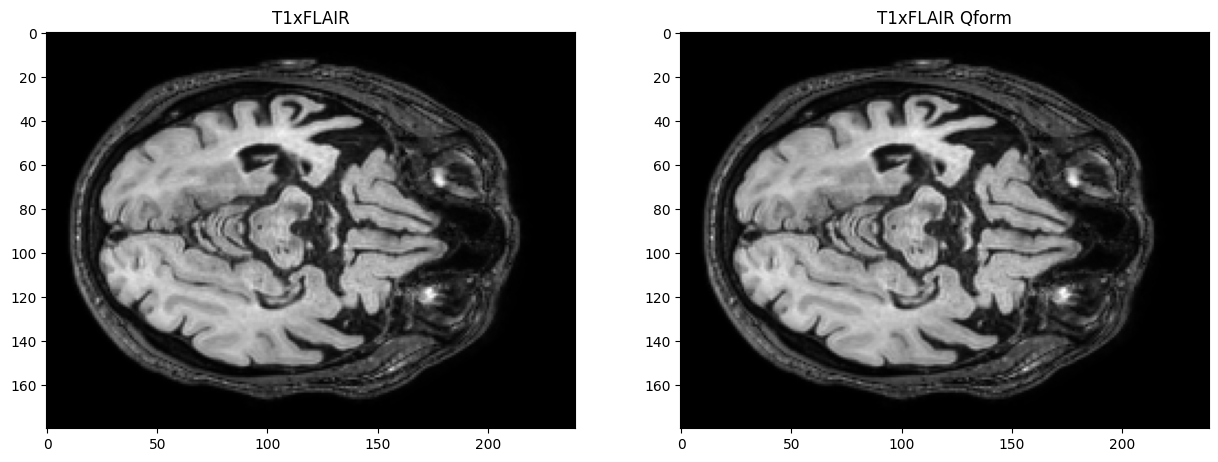

In [12]:
# Display two MRI slices of two different modalities of one subject
import matplotlib.pyplot as plt
import numpy as np

def display_slices(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    q_t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(q_t1xflair_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    q_t1xflair_img = nib.load(q_t1xflair_file)
    
    t1xflair_data = t1xflair_img.get_fdata()
    q_t1xflair_data = q_t1xflair_img.get_fdata()
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(t1xflair_data[:, :, 130], cmap="gray")
    axs[0].set_title("T1xFLAIR")
    axs[1].imshow(q_t1xflair_data[:, :, 130], cmap="gray")
    axs[1].set_title("T1xFLAIR Qform")
    plt.show()
    
# Example usage
display_slices("046")

In [3]:
print("Hello World!")
def set_qform_and_save(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
    t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(t1xflair_seg_file) or not os.path.exists(t1_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    t1xflair_seg_img = nib.load(t1xflair_seg_file)
    t1_img = nib.load(t1_file)
    
    t1_qform = t1_img.get_qform()
    
    t1xflair_img.set_qform(t1_qform)
    t1xflair_seg_img.set_qform(t1_qform)
    
    new_t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    new_t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg_qform.nii")
    
    nib.save(t1xflair_img, new_t1xflair_file)
    nib.save(t1xflair_seg_img, new_t1xflair_seg_file)
    
    print(f"New files saved for subject {subject_id}:")
    print(new_t1xflair_file)
    print(new_t1xflair_seg_file)

# Example usage
set_qform_and_save("075")

Hello World!
New files saved for subject 075:
/mnt/turing/LIA/pazienti/075/075_T1xFLAIR_qform.nii
/mnt/turing/LIA/pazienti/075/075_ChP_mask_T1xFLAIR_manual_seg_qform.nii
